In [44]:
# imports
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from numpy import linalg


import numpy as np
import cv2
from matplotlib import pyplot as plt
from pandas import DataFrame
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
import operator

from sklearn.cluster import KMeans
import mahotas as mt


from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



# VGG16 Model For Feature Extraction

In [45]:
from keras import models
from keras import layers

In [46]:
input_shape = (100, 100, 3)
weights = 'imagenet'
pooling = 'max'

model = models.Sequential()
base_model = VGG16(weights=weights, input_shape= input_shape, pooling=pooling, include_top=False)
model.add(base_model)
model.add(layers.Flatten())
base_model.trainable = False
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


# Import img data and preprocess for VGG16

In [47]:
file_path = 'C:/Users/Joe/Desktop/UNI/Yr3/Dissertation/Datasets/101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(file_path))]

img_data = []
img_classes = []

num_categories = 6
num_imgs = 9
selected_categories = np.random.randint(0, 101, num_categories, dtype="I")

for a, cat in enumerate(selected_categories):
    folder_path = file_path + '/' + folder_names[cat]
    image_names = [a for a in sorted(
        os.listdir(folder_path))][:num_imgs]

    for b, img_name in enumerate(image_names):
        img_classes.append(folder_names[cat])
        img_path = folder_path + '/' + img_name
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        
        

        if img is not None:
            img_data.append(img)


# Load Entire Dataset for training

In [48]:
file_path = 'C:/Users/Joe/Desktop/UNI/Yr3/Dissertation/Datasets/101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(file_path))]

full_db_img_data = []


full_db_img_classes = []

for a in range(98):
    folder_path = file_path + '/' + folder_names[a]
    image_names = [a for a in sorted(
        os.listdir(folder_path))]
    
    for b, img_name in enumerate(image_names):
        full_db_img_classes.append(folder_names[a])
        img_path = folder_path + '/' + img_name
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        
        if img is not None:
            full_db_img_data.append(img)


In [49]:
def vgg_feat_extract(img):
    img = np.expand_dims(img, axis = 0)
    p_img = preprocess_input(img)
    feats = model.predict(p_img)
    return (feats[0] / np.linalg.norm(feats[0]))

In [50]:
def vgg_db_feats(img_db):
    db_f_vector = []
    for img in img_db:
        db_f_vector.append(vgg_feat_extract(img))
    return db_f_vector

In [51]:
test_db = vgg_db_feats(img_data)
stdSlr = StandardScaler().fit(test_db)
test_feats = stdSlr.transform(test_db)

1/1 [==============================] - 0s 83ms/step


# Train SVM

In [52]:
X_train, X_test, y_train, y_test = train_test_split(test_feats,
                                                    img_classes,
                                                    test_size=0.30)


In [53]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(accuracy_score(y_test, predicted))


1.0


# Test

In [54]:
test_query = img_data[10]
query_feats = vgg_feat_extract(test_query)
query_feats = query_feats.reshape(1, -1)
predict_query = clf.predict(query_feats)


1/1 [==============================] - 0s 84ms/step


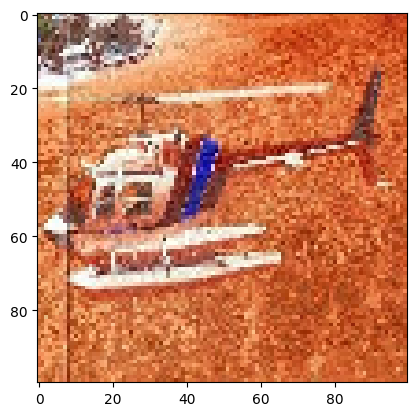

In [55]:
plt.imshow(img_data[10])

In [56]:
predict_query

array(['helicopter'], dtype='<U10')

# Train SVM on Full DS

In [57]:
from M3 import M3

In [59]:
M3_svm_train = M3(full_db_img_data)
full_db_feats = M3_svm_train.vgg_db_feats(full_db_img_data)


1/1 [==============================] - 0s 97ms/step
db feats extracted


In [91]:
M3_svm_train.SVM_train(full_db_feats, full_db_img_classes)


SVM Accuracy Score = 0.7863282848956201
Saving Model


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [92]:
#M3_svm_train.load_SVM()


# Test Model

In [111]:
testNum =555

test_img = full_db_img_data[testNum]
test22 = M3_svm_train.predict_img(test_img)

1/1 [==============================] - 0s 140ms/step
Predicted: ['Faces']


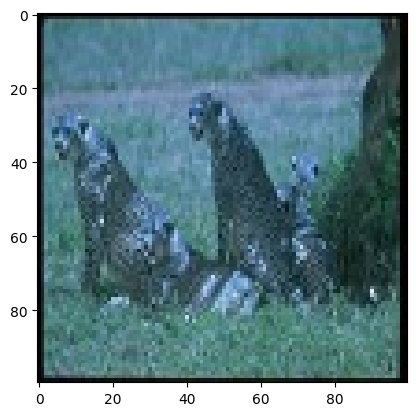

In [112]:
plt.imshow(full_db_img_data[testNum])


In [113]:
print("GT: {}".format(full_db_img_classes[testNum]))
print("M3: {}".format(test22))


GT: Leopards
M3: ['Faces']
